<a href="https://colab.research.google.com/github/rohit958/Coursera_repo/blob/main/LaptopDataExploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy as sc

In [11]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


<Axes: xlabel='CPU_frequency', ylabel='Price'>

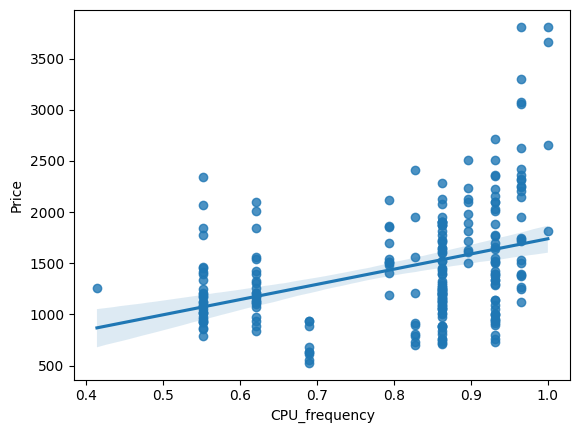

In [16]:
# CPU_frequency plot
sns.regplot(x="CPU_frequency",y="Price",data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

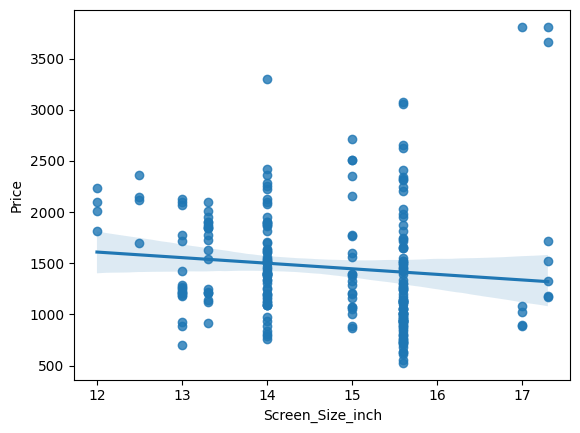

In [17]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch",y="Price",data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

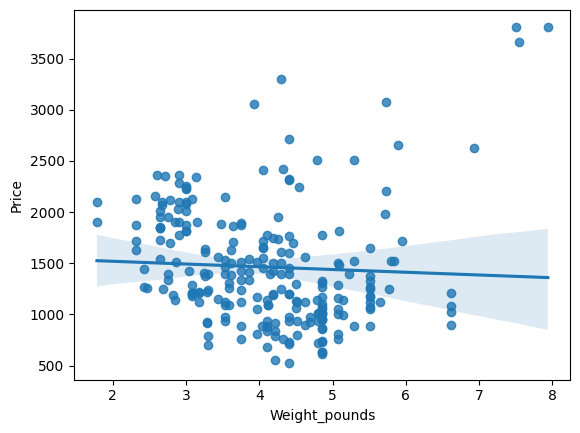

In [18]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds",y="Price",data=df)

In [19]:
df[["CPU_frequency","Weight_pounds","Screen_Size_inch","Price"]].corr()

,CPU_frequency,Weight_pounds,Screen_Size_inch,Price
CPU_frequency,1.000000,0.066522,-0.000948,0.366666
Weight_pounds,0.066522,1.000000,0.797534,-0.050312
Screen_Size_inch,-0.000948,0.797534,1.000000,-0.110644
Price,0.366666,-0.050312,-0.110644,1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


Categorical features

<Axes: xlabel='Category', ylabel='Price'>

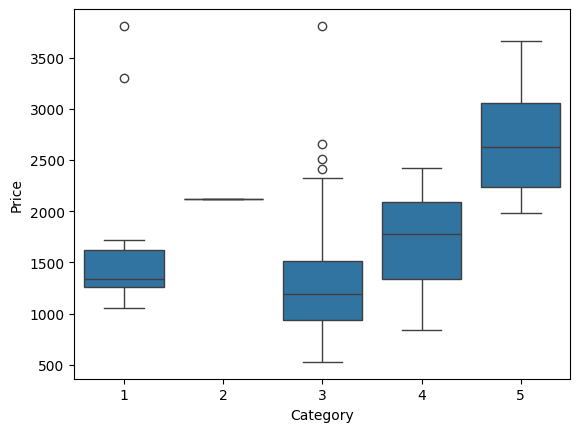

In [20]:
#category
sns.boxplot(x="Category",y="Price",data=df)

<Axes: xlabel='GPU', ylabel='Price'>

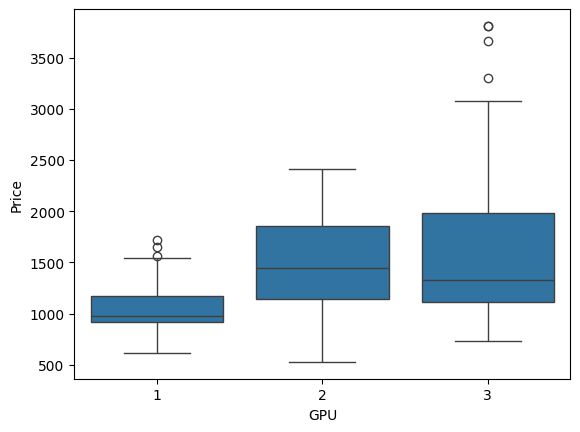

In [21]:
#GPU
sns.boxplot(x="GPU",y="Price",data=df)

<Axes: xlabel='OS', ylabel='Price'>

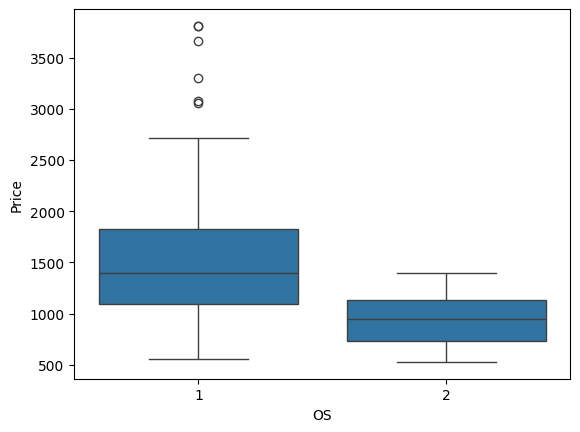

In [22]:
#OS
sns.boxplot(x="OS",y="Price",data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

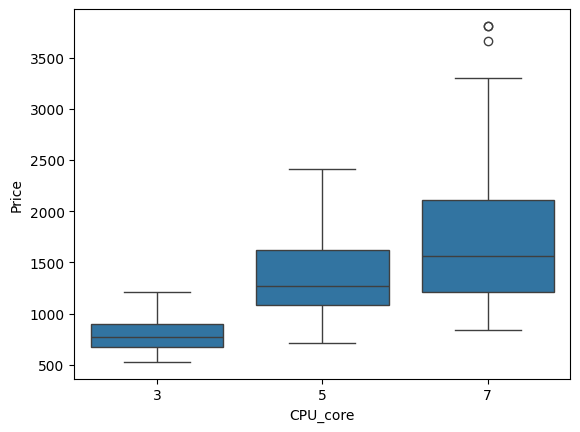

In [23]:
#CPU core
sns.boxplot(x="CPU_core",y="Price",data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

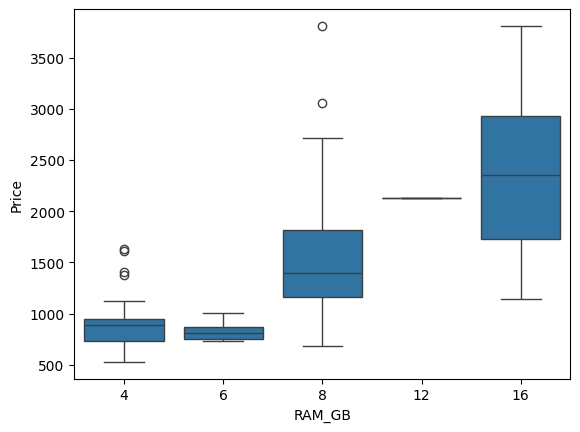

In [24]:
#RAM_GB
sns.boxplot(x="RAM_GB",y="Price",data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

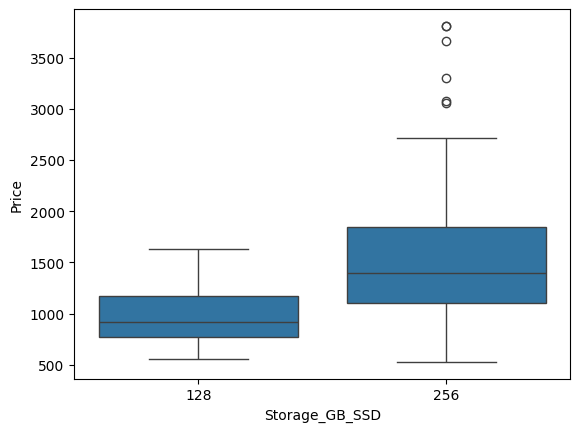

In [26]:
#Storage_GB_SSD
sns.boxplot(x="Storage_GB_SSD",y="Price",data=df)

Task 2 - Descriptive Statistical Analysis

In [30]:
df.describe(include="object")

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [31]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


Grouping

In [34]:
df_group=df[["GPU","CPU_core","Price"]]

In [35]:
group_test=df_group.groupby(["GPU","CPU_core"],as_index=False).mean()
print(group_test)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [38]:
group_test.pivot(index="GPU",columns="CPU_core")

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

### Pearson values and P-values


In [42]:
#GPU
pearson,p_value=sc.stats.pearsonr(df["GPU"],df["Price"])
print("pearson= {} P-value={}".format(pearson,p_value))

pearson= 0.2882981988881428 P-value=6.166949698364282e-06


In [44]:
#CPU_core
pearson,p_value=sc.stats.pearsonr(df["CPU_core"],df["Price"])
print("pearson= {} P-value={}".format(pearson,p_value))

pearson= 0.4593977773355115 P-value=7.912950127009034e-14


In [45]:
#RAM
pearson,p_value=sc.stats.pearsonr(df["RAM_GB"],df["Price"])
print("pearson= {} P-value={}".format(pearson,p_value))

pearson= 0.5492972971857844 P-value=3.681560628842868e-20


In [46]:
#Screen_Size_inch
pearson,p_value=sc.stats.pearsonr(df["Screen_Size_inch"],df["Price"])
print("pearson= {} P-value={}".format(pearson,p_value))

pearson= -0.11064420817118266 P-value=0.08853397846830766


In [49]:
for param in ['CPU_frequency','Storage_GB_SSD','Weight_pounds','OS','Category']:
    pearson_coef, p_value = sc.stats.pearsonr(df[param], df['Price'])
    print("\n",param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)


 CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09

 Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174

 Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.43976938534338944

 OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246749

 Category
The Pearson Correlation Coefficient for  Category  is 0.28624275581264125  with a P-value of P = 7.225696235806733e-06
